# 1. DATA CLEANING PORTION

## Importing libraries and loading file

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
df = pd.read_csv('GSS.csv')
df.head()

,Gss year for this respondent,Ballot used for interview,Rs income in constant $,R is how tall,R weighs how much,Rs religious preference,Respondents income,Total family income,Number of persons in household,Race of respondent,Respondents sex,Rs highest degree,Age of respondent,Number of children,Marital status,Labor force status,Respondent id number,R's family's negative attitudes about mh problems
0,2000,Ballot a,5985.0,Not applicable,Not applicable,Protestant,$8000 to 9999,No answer,2.0,White,Male,Bachelor,26,0,Never married,Working fulltime,1.0,Not applicable
1,2000,Ballot c,5985.0,Not applicable,Not applicable,Protestant,$8000 to 9999,$8000 to 9999,1.0,White,Female,High school,48,2,Divorced,Working fulltime,2.0,Not applicable
2,2000,Ballot b,0.0,Not applicable,Not applicable,Protestant,Not applicable,$15000 - 19999,1.0,White,Female,High school,67,5,Widowed,Keeping house,3.0,Not applicable
3,2000,Ballot b,0.0,Not applicable,Not applicable,Orthodox-christian,Not applicable,$25000 or more,1.0,White,Female,High school,39,1,Never married,Working fulltime,4.0,Not applicable
4,2000,Ballot b,0.0,Not applicable,Not applicable,None,Not applicable,$25000 or more,1.0,White,Female,Junior college,25,0,Divorced,Working fulltime,5.0,Not applicable


## Dropping unwanted columns

In [2]:
df.drop(columns= ["R's family's negative attitudes about mh problems", 
                  "Ballot used for interview", "Respondent id number", "Respondents income",'Total family income'], inplace = True)
df.drop(df.columns[0], axis=1, inplace=True)

## Dropping rows with NA values

In [3]:
df.dropna(inplace = True)

## Renaming Columns

In [4]:
df.rename(columns={ 'Rs income in constant $': 'Income', 
                       'R is how tall': 'Height','R weighs how much': 'Weight','Rs religious preference': 'Religion',
                        'Number of persons in household': 'Number of Household',
                         'Race of respondent': 'Race', 'Respondents sex': 'Sex', 'Rs highest degree': 'Degree Completed',
                        'Age of respondent': 'Age', 'Number of children': 'Children'}, inplace = True)

## Replacing values in dataframe

In [5]:
df['Degree Completed'].replace({"Lt high school": 'High school',  "Junior college": 'Under Grad',"Bachelor": 'Under Grad'}, inplace=True)
df['Marital status'].replace({'Never married':'Unmarried',  'Separated':'Unmarried', 'Divorced':'Unmarried', 'Widowed':'Unmarried'}, inplace = True)
df['Labor force status'].replace({'Temp not working':'Unemployed',  'Keeping house':'Unemployed', 'School':'Unemployed', 'Other':'Unemployed',  'Unempl, laid off': 'Unemployed'}, inplace = True)
df['Religion'].replace({'Hinduism':'Other', 'Inter-nondenominational':'Other', 'Moslem/islam':'Other', 'Native american': "Other",'Orthodox-christian': 'Other', 'Other': "Other", 'Other eastern': "Other" }, inplace = True)

## Changing categorical variables to Dummy variables

In [6]:
new_df = pd.get_dummies(df, columns=["Religion","Race","Sex","Degree Completed", 'Marital status', 'Labor force status'])

## Dropping unwanted Dummy variables

In [7]:
new_df.drop(columns= ["Labor force status_No answer", "Marital status_No answer","Religion_Don't know", "Religion_No answer", "Degree Completed_Don't know", "Degree Completed_No answer"], inplace = True)

## Indexing and Dropping more unwanted rows

In [8]:
new_df = new_df[new_df.Children != 'Eight or more']
new_df = new_df[new_df.Children != 'Dk na']

In [9]:
new_df = new_df[new_df.Age != '89 or older']
new_df = new_df[new_df.Age != 'No answer']

In [10]:
weight = new_df[new_df['Weight'] == 'Not applicable' ].index
weight_no = new_df[new_df['Weight'] == 'No answer' ].index
weight_not = new_df[new_df['Weight'] == "Don't know" ].index

new_df.drop(weight,  inplace=True)
new_df.drop(weight_no,  inplace=True)
new_df.drop(weight_not,  inplace=True)

In [11]:
height = new_df[new_df['Height'] == 'Not applicable' ].index
height_no = new_df[new_df['Height'] == 'No answer' ].index
height_not = new_df[new_df['Height'] == "Don't know" ].index


new_df.drop(height,inplace=True)
new_df.drop(height_not,inplace=True)
new_df.drop(height_no,inplace=True)

## Changing data type of rows

In [12]:
new_df[['Height', 'Weight', 'Age', 'Children']] = new_df[['Height', 'Weight', 'Age', 'Children']].apply(pd.to_numeric) 

## New and cleaned Dataframe

In [13]:
new_df.head()

,Income,Height,Weight,Number of Household,Age,Children,Religion_Buddhism,Religion_Catholic,Religion_Christian,Religion_Jewish,...,Sex_Male,Degree Completed_Graduate,Degree Completed_High school,Degree Completed_Under Grad,Marital status_Married,Marital status_Unmarried,Labor force status_Retired,Labor force status_Unemployed,Labor force status_Working fulltime,Labor force status_Working parttime
18945,39022.50,72,190,1.0,53,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
18946,39022.50,60,97,2.0,26,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
18948,6503.75,68,160,4.0,56,2,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
18958,11233.75,65,156,2.0,40,2,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
18960,11233.75,66,210,2.0,56,3,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1


# 2. DATA ANALYSIS

### Creating a linear regression function

In [15]:
def regression(independent, dependent):
    X =new_df.loc[:, independent].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = new_df.loc[:, dependent ].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    
    
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    

    plt.scatter(X, Y)
    plt.title("Linear regression of " + dependent + ' against ' + independent)
    plt.xlabel(independent)
    plt.ylabel(dependent)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    
    r = model.rsquared * 100
    rounded = r.round(2)
    print(str(rounded) + "% of the variation in " + dependent + " is explained by " + independent)

    X_prediction = float(input ("What is your " + independent + " ? "))
    equation = (int(linear_regressor.coef_ [0][0])* X_prediction) + int(linear_regressor.intercept_[0]) 
    print("Your predicted" ,dependent ,"is", equation)
    

### Calling out function

Please input independent variable: Height
Please input dependent variable: Weight


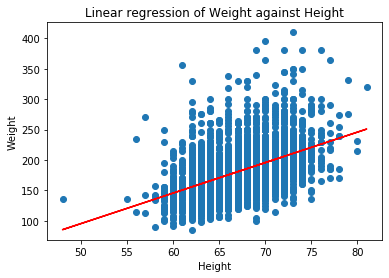

95.39% of the variation in Weight is explained by Height
What is your Height ? 60
Your predicted Weight is 145.0


In [16]:
independent_input = input('Please input independent variable: ')
dependent_input = input('Please input dependent variable: ')
regression(independent_input, dependent_input)

## Logistical Model

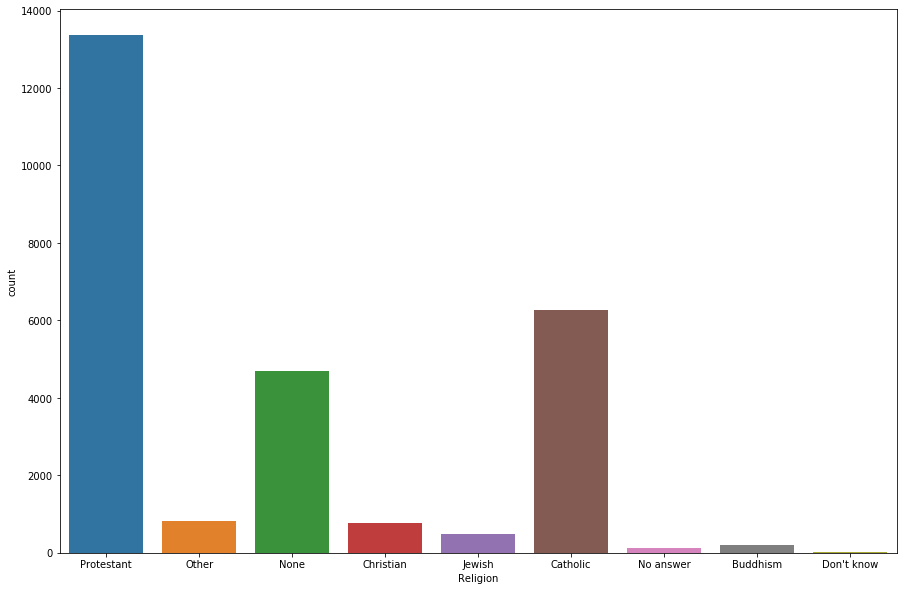

In [24]:
def logistic(dependent):
    #X =df.loc[:, independent].values.reshape(-1, 1)  
    Y =df.loc[:, dependent ].values.reshape(-1, 1)
    plt.figure(figsize=(15, 10))
    sns.countplot(x= dependent, data=df)
    #sns.boxplot(x= independent,y= dependent,data= df,palette='winter')

logistic("Religion")



In [25]:
def logistic1(independent, dependent):
    X =df.loc[:, independent].values.reshape(-1, 1)  
    Y =df.loc[:, dependent ].values.reshape(-1, 1)
    plt.figure(figsize=(15, 10))
    sns.boxplot(x= independent,y= dependent,data= df,palette='winter')
logistic1("Religion", "Age")

ValueError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1080x720 with 0 Axes>